### **EDA 1**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/Diabetes.csv")

In [3]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,2,138,62,35,0,33.6,0.127,47,Yes
1,1,0,84,82,31,125,38.2,0.233,23,No
2,2,0,145,0,0,0,44.2,0.630,31,Yes
3,3,0,135,68,42,250,42.3,0.365,24,Yes
4,4,1,139,62,41,480,40.7,0.536,21,No


In [4]:
df.tail()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,1995,2,75,64,24,55,29.7,0.370,33,No
1996,1996,8,179,72,42,130,32.7,0.719,36,Yes
1997,1997,6,85,78,0,0,31.2,0.382,42,No
1998,1998,0,129,110,46,130,67.1,0.319,26,Yes
1999,1999,2,81,72,15,76,30.1,0.547,25,No


In [5]:
df.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   Pregnancies               2000 non-null   int64  
 2   Glucose                   2000 non-null   int64  
 3   BloodPressure             2000 non-null   int64  
 4   SkinThickness             2000 non-null   int64  
 5   Insulin                   2000 non-null   int64  
 6   BMI                       2000 non-null   float64
 7   DiabetesPedigreeFunction  2000 non-null   float64
 8   Age                       2000 non-null   int64  
 9   Outcome                   2000 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 156.4+ KB


In [7]:
df.nunique()

,0
Unnamed: 0,2000
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,53
Insulin,182
BMI,247
DiabetesPedigreeFunction,505
Age,52
Outcome,2


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500
std,577.494589,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,499.750000,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000
50%,999.500000,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000
75%,1499.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000
max,1999.000000,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000


In [10]:
#df.drop(['column name'],axis=0 - row/ axis=1 - column, inplace=True) - not to use in different dataset
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Qualitative - categorical data - 'Outcome'

Quantitative- numbers - Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'

In [11]:
num=df.select_dtypes(include="number")
num.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [16]:
num.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,53
Insulin,182
BMI,247
DiabetesPedigreeFunction,505
Age,52


In [12]:
cat=df.select_dtypes(include="object")
cat.head()

,Outcome
0,Yes
1,No
2,Yes
3,Yes
4,No


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outcome']=le.fit_transform(df['Outcome'])
df['Outcome'].head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe_df=pd.DataFrame(ohe.fit_transform(df[['Outcome']]).toarray())
ohe_df.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


### **EDA - 2**

Analysis - create a plot

In [20]:
x=[]
for i in num.columns:
  if num[i].nunique()<30:
    x.append(i)
print(x)

['Pregnancies']


In [22]:
discrete=df['Pregnancies']
discrete.head()

,Pregnancies
0,2
1,0
2,0
3,0
4,1


In [23]:
num.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [24]:
num.drop(['Pregnancies'],axis=1,inplace=True)
num.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138,62,35,0,33.6,0.127,47
1,84,82,31,125,38.2,0.233,23
2,145,0,0,0,44.2,0.630,31
3,135,68,42,250,42.3,0.365,24
4,139,62,41,480,40.7,0.536,21


7 - continue - num - hist

1 - discrete - discrete - countplot

1 - categorical - cat - countplot

## Univarate analysis

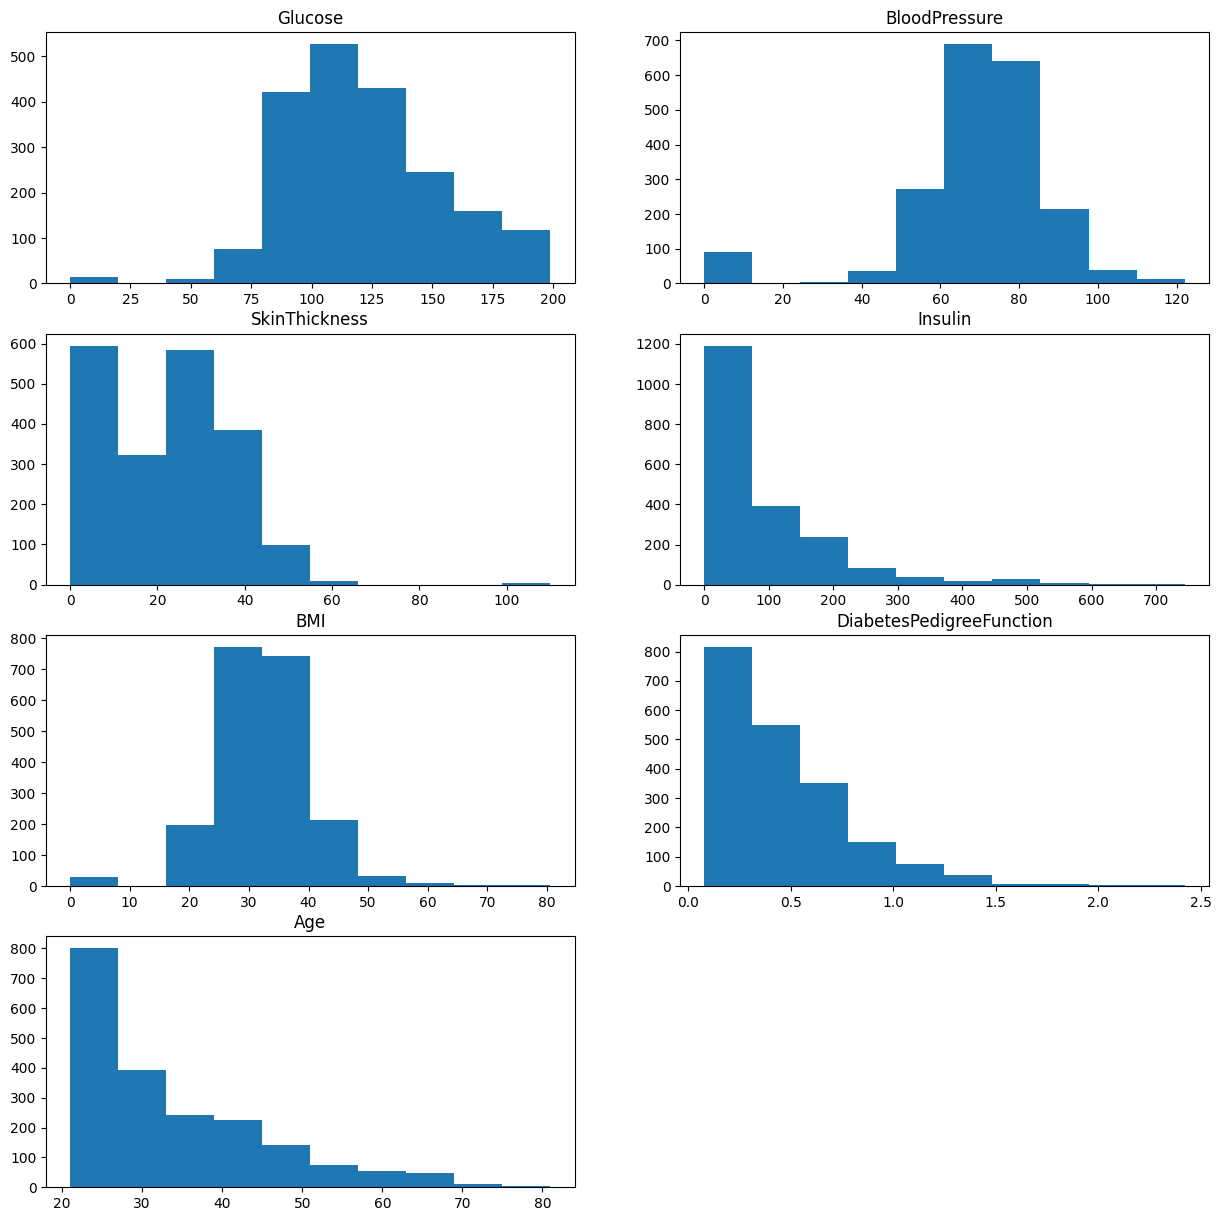

In [32]:
#continues column
plt.figure(figsize=(15,15)) #total height and width
plotnum=1
for i in num.columns:
  plt.subplot(4,2,plotnum)
  plt.hist(num[i])
  plt.title(i)
  plotnum=plotnum+1
plt.show()

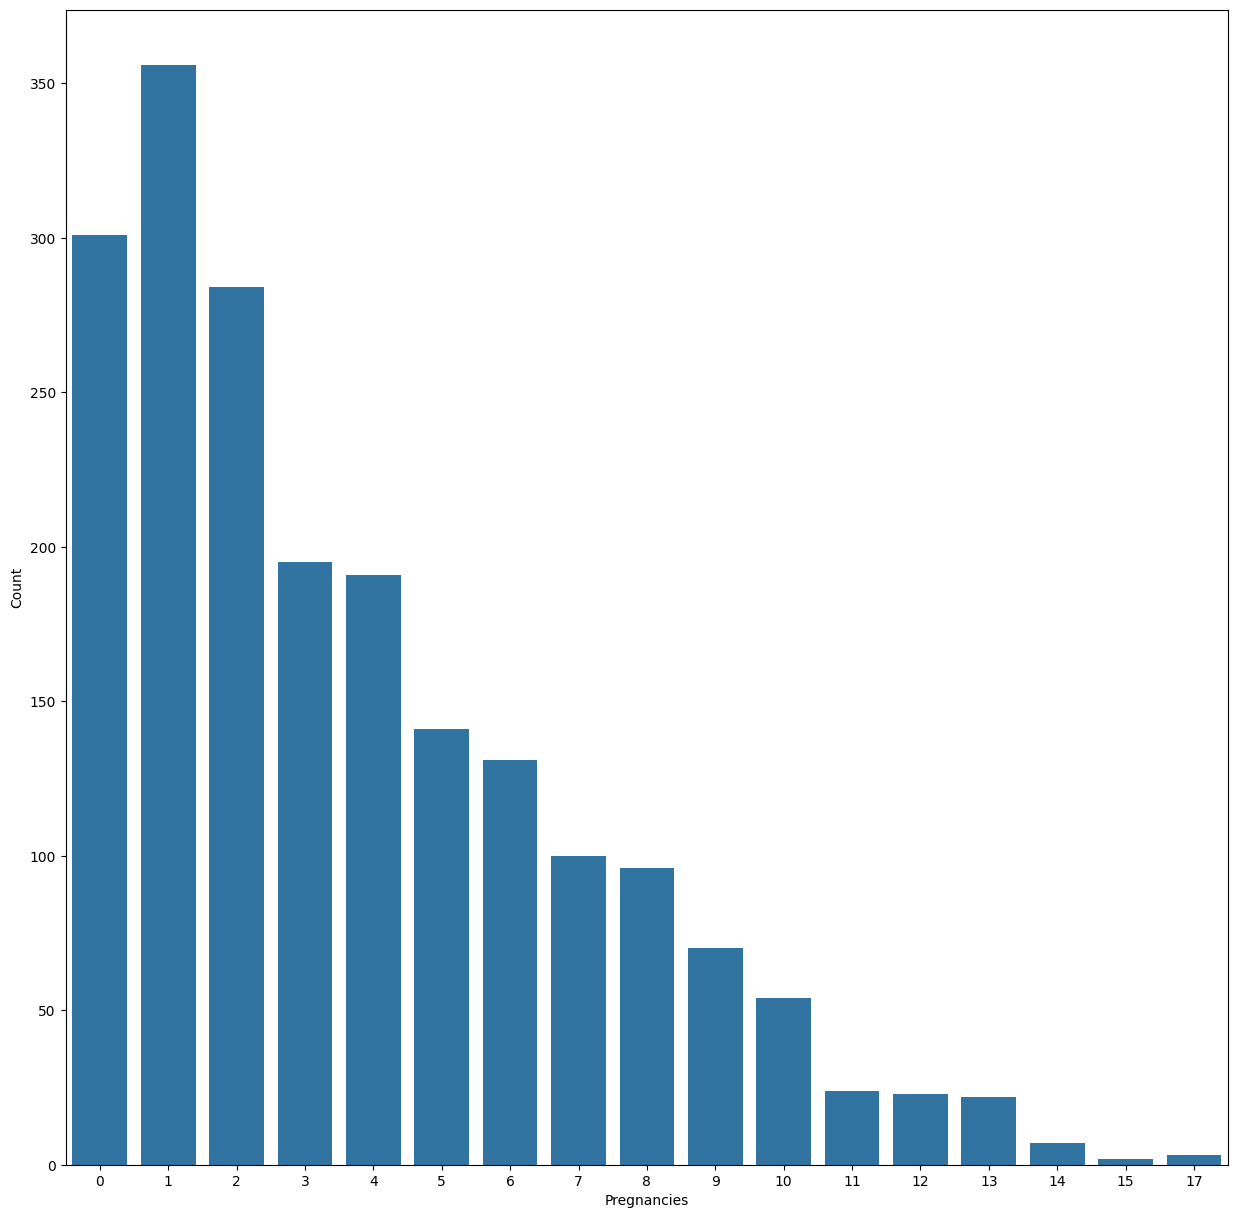

In [36]:
#Discrete
plt.figure(figsize=(15,15))
sns.countplot(x=discrete)
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.show()

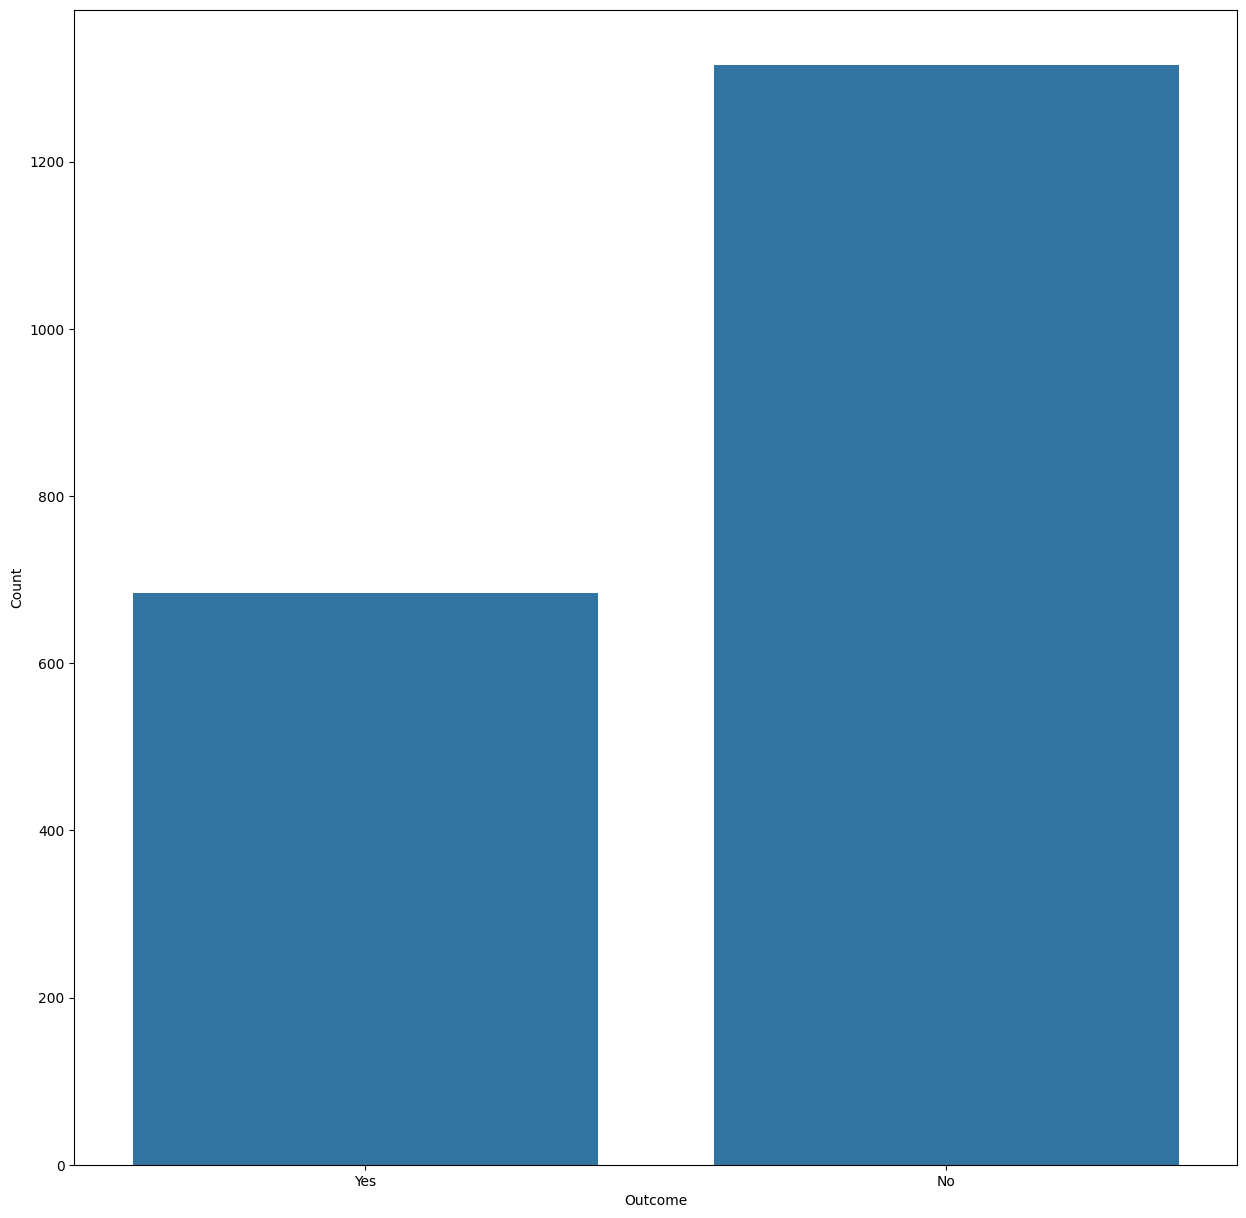

In [38]:
#categorical data
plt.figure(figsize=(15,15))
sns.countplot(x=cat['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

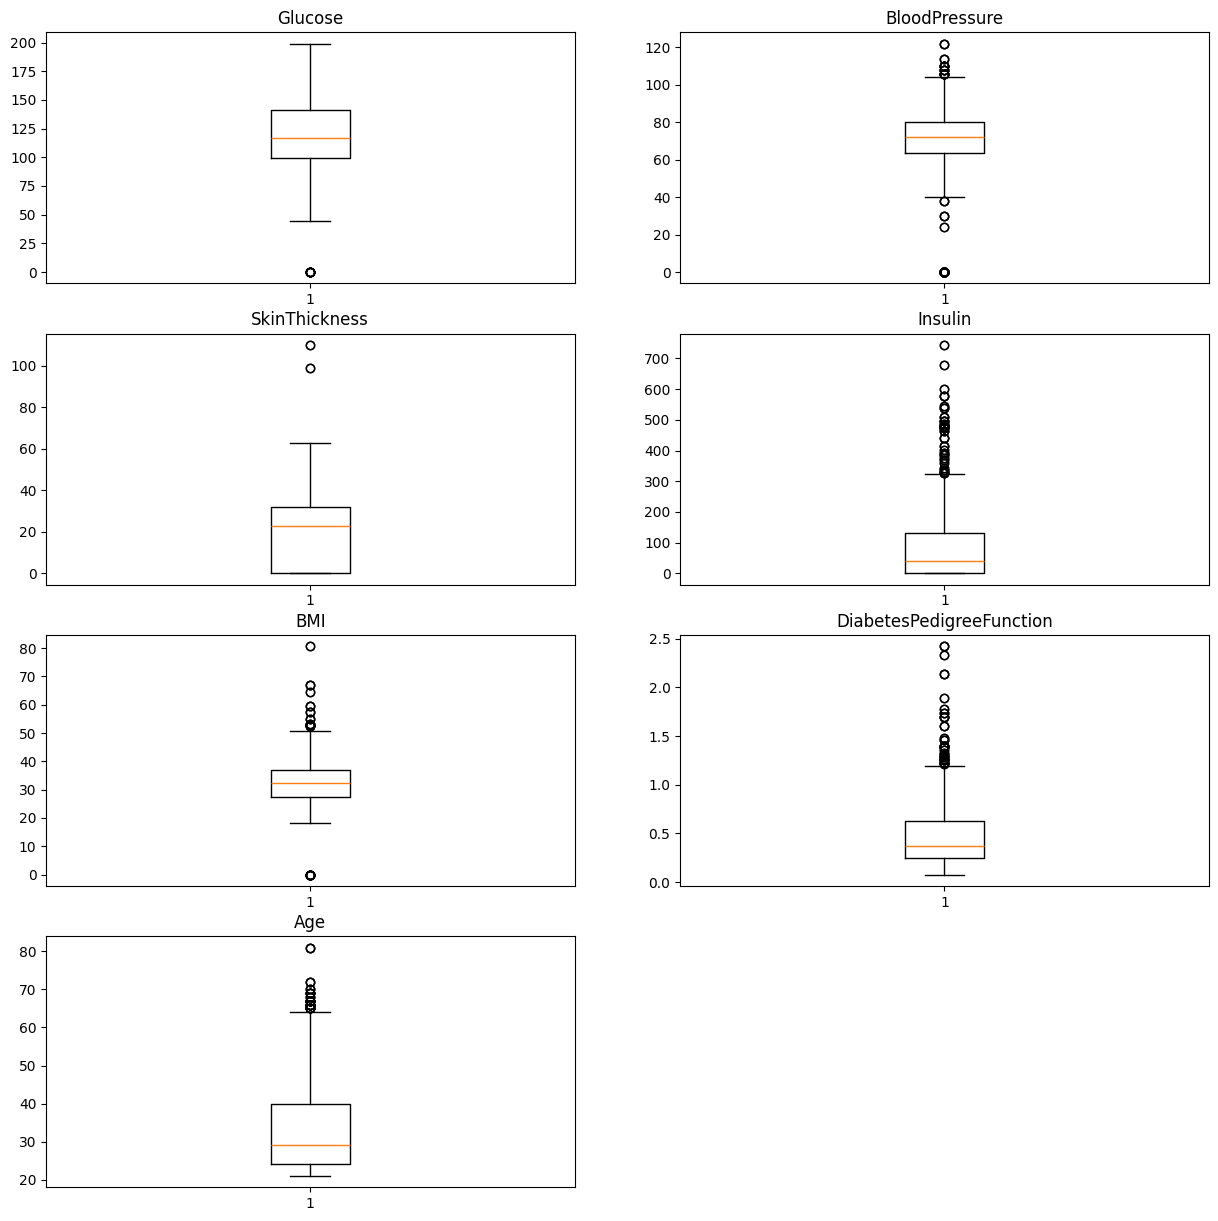

In [43]:
#continues column
plt.figure(figsize=(15,15)) #total height and width
plotnum=1
for i in num.columns:
  plt.subplot(4,2,plotnum)
  plt.boxplot(num[i])
  plt.title(i)
  plotnum=plotnum+1
plt.show()

## Bivariance

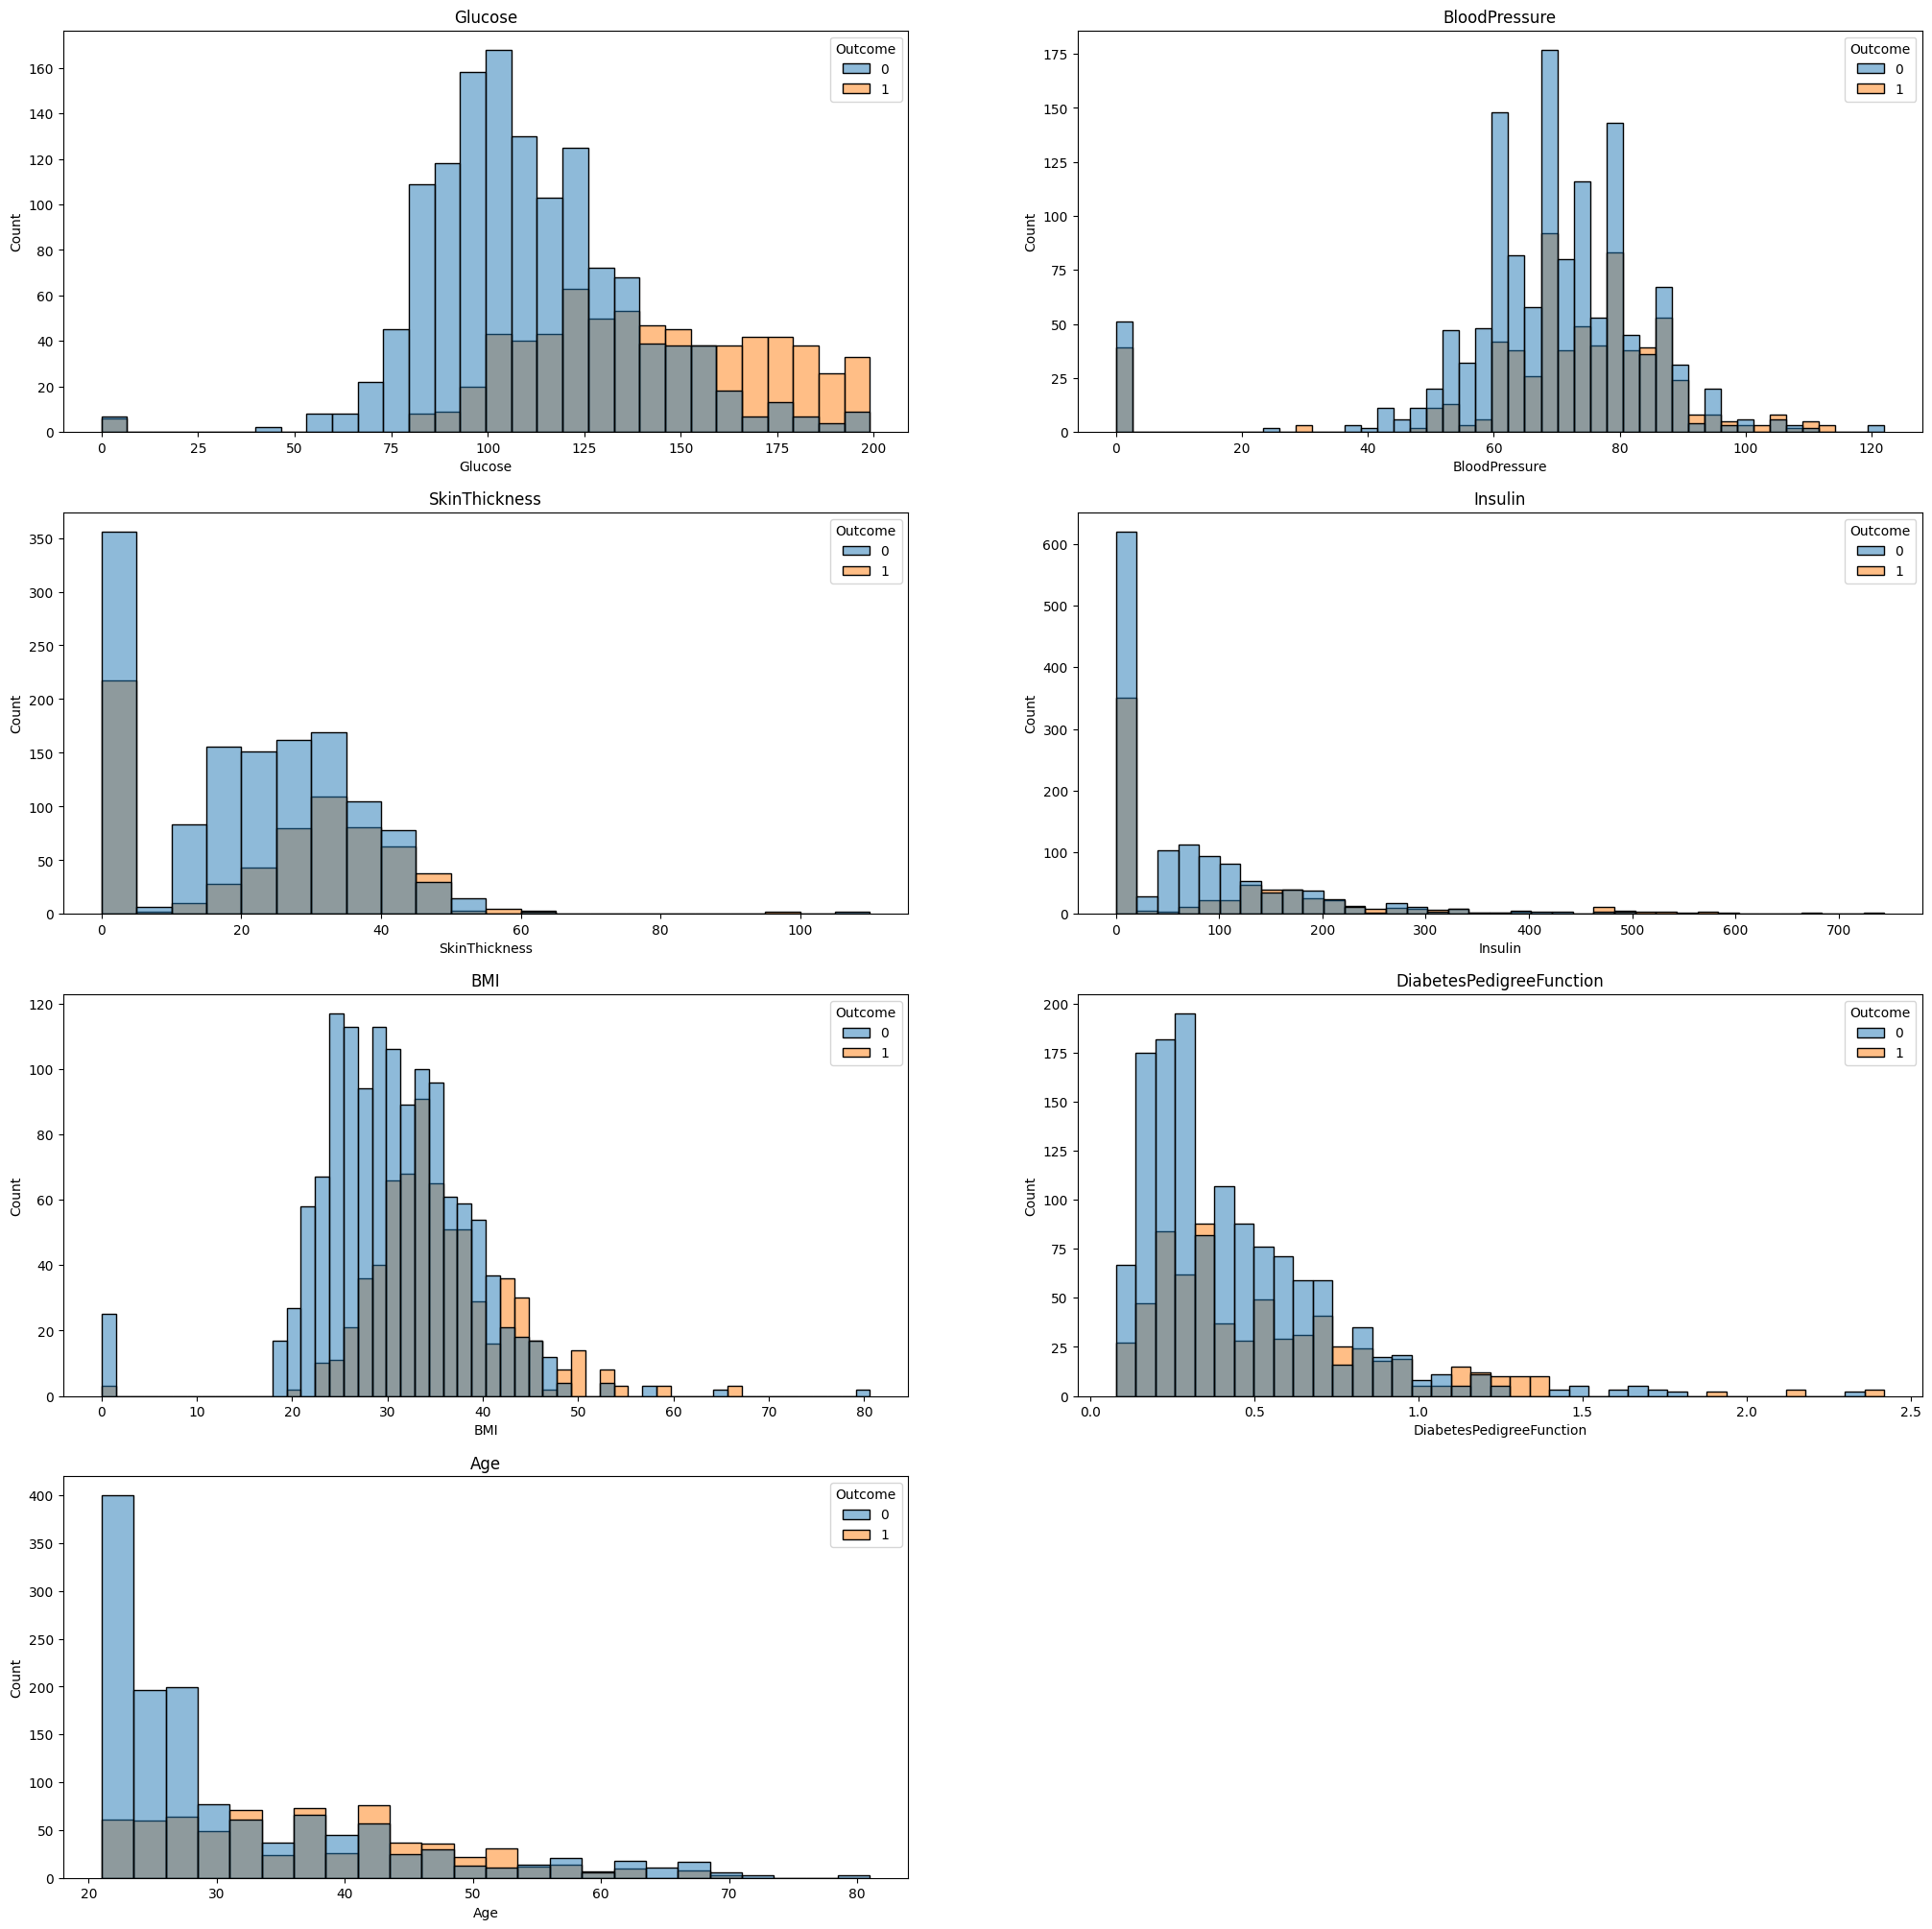

<Figure size 640x480 with 0 Axes>

In [46]:
#compare with categorical column
plt.figure(figsize=(25,25))
plotnum=1
for i in num.columns:
  plt.subplot(4,2,plotnum)
  sns.histplot(x=df[i],hue=df['Outcome']) #hue - comparing with 2 column
  #plot.hist(x=df[i],hue=df['Outcome']) - dont have hue parameter
  plt.title(i)
  plotnum=plotnum+1
plt.show()
plt.tight_layout()

<Axes: xlabel='Age', ylabel='BMI'>

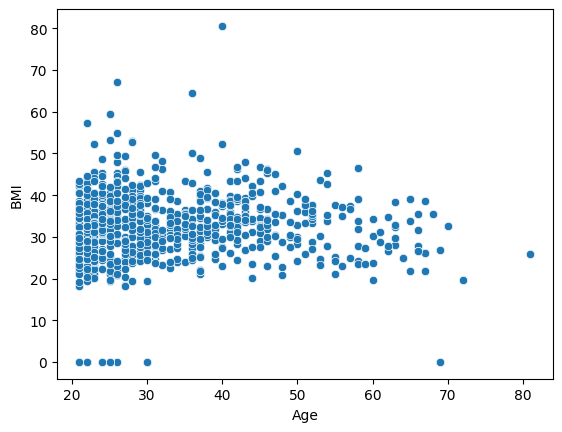

In [48]:
#numerical to numerical
sns.scatterplot(x=num['Age'],y=num['BMI'])

<Axes: xlabel='Pregnancies', ylabel='count'>

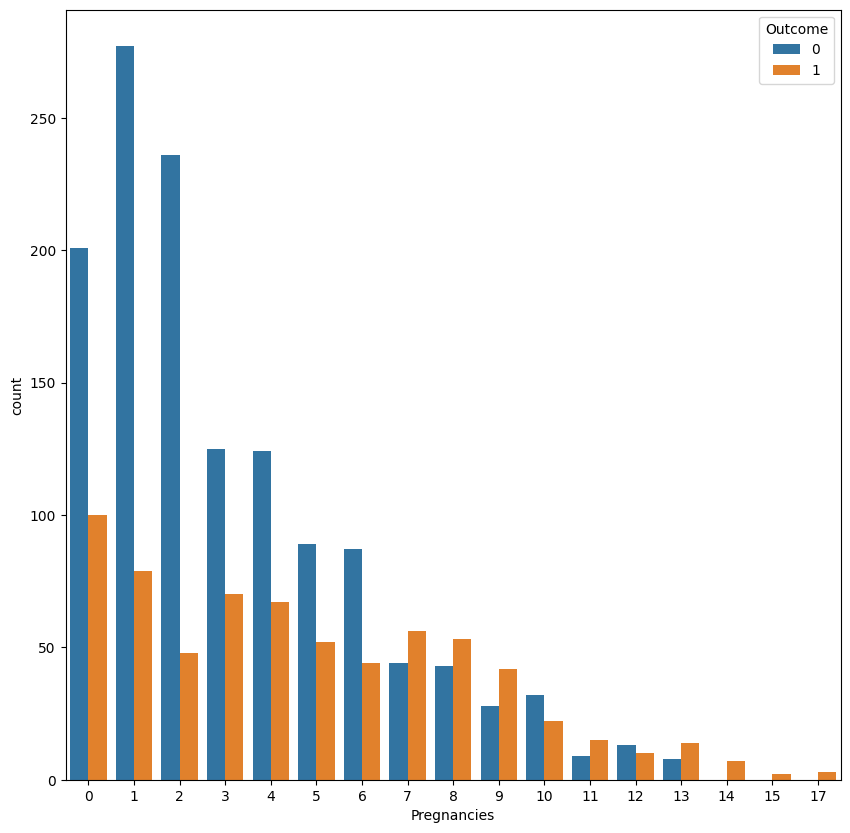

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Pregnancies'],hue=df['Outcome'])

Mulitvariate analysis

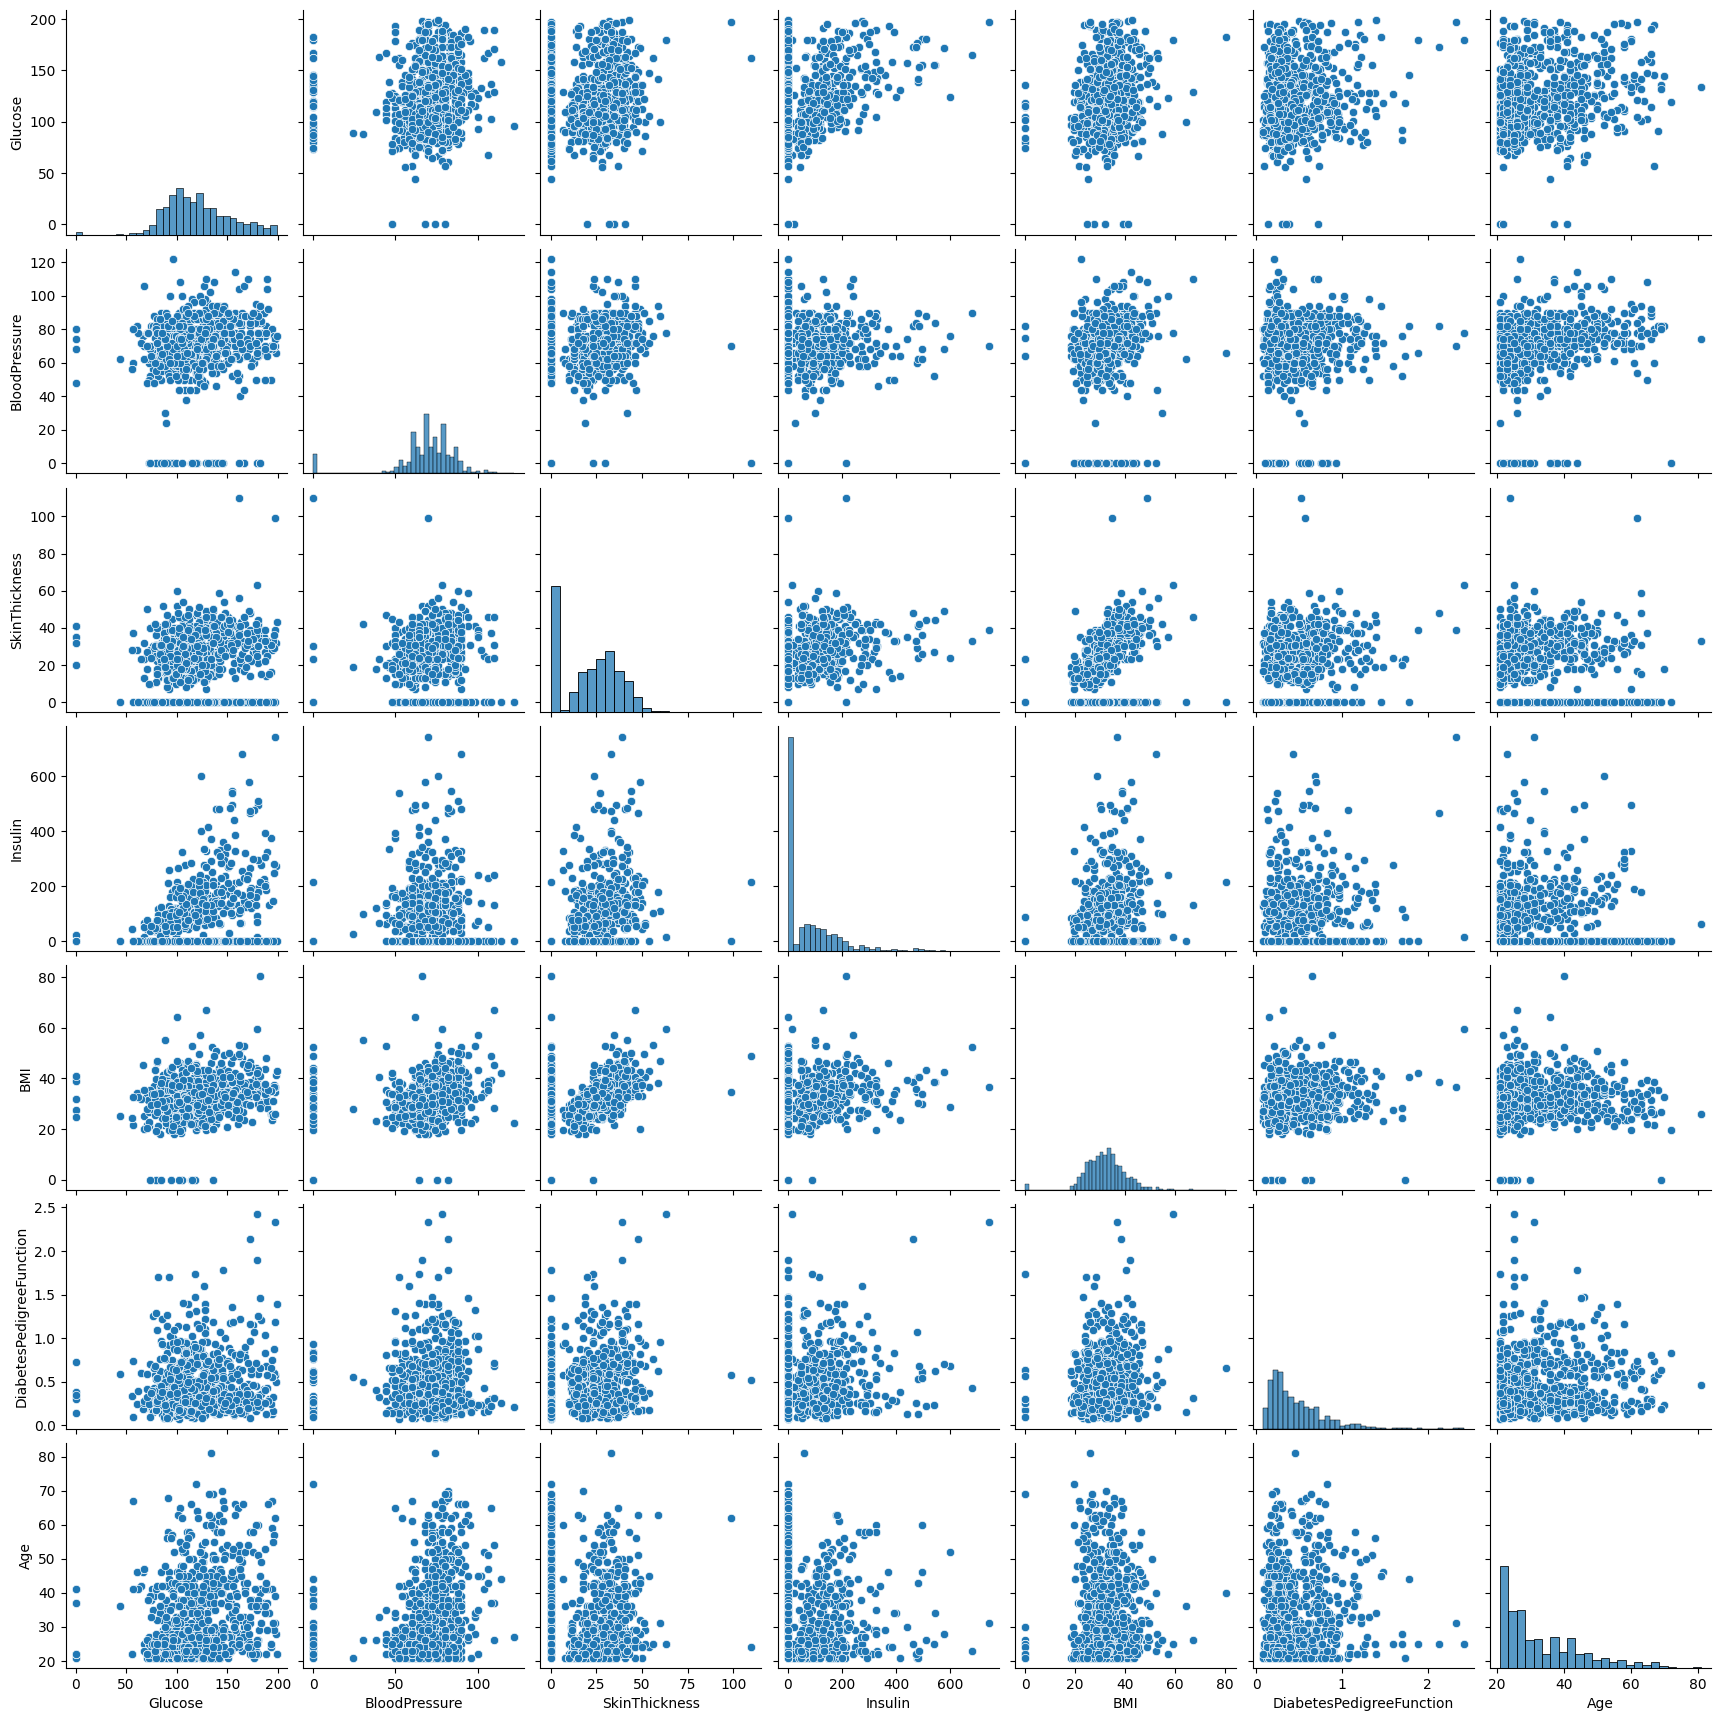

In [52]:
sns.pairplot(num)

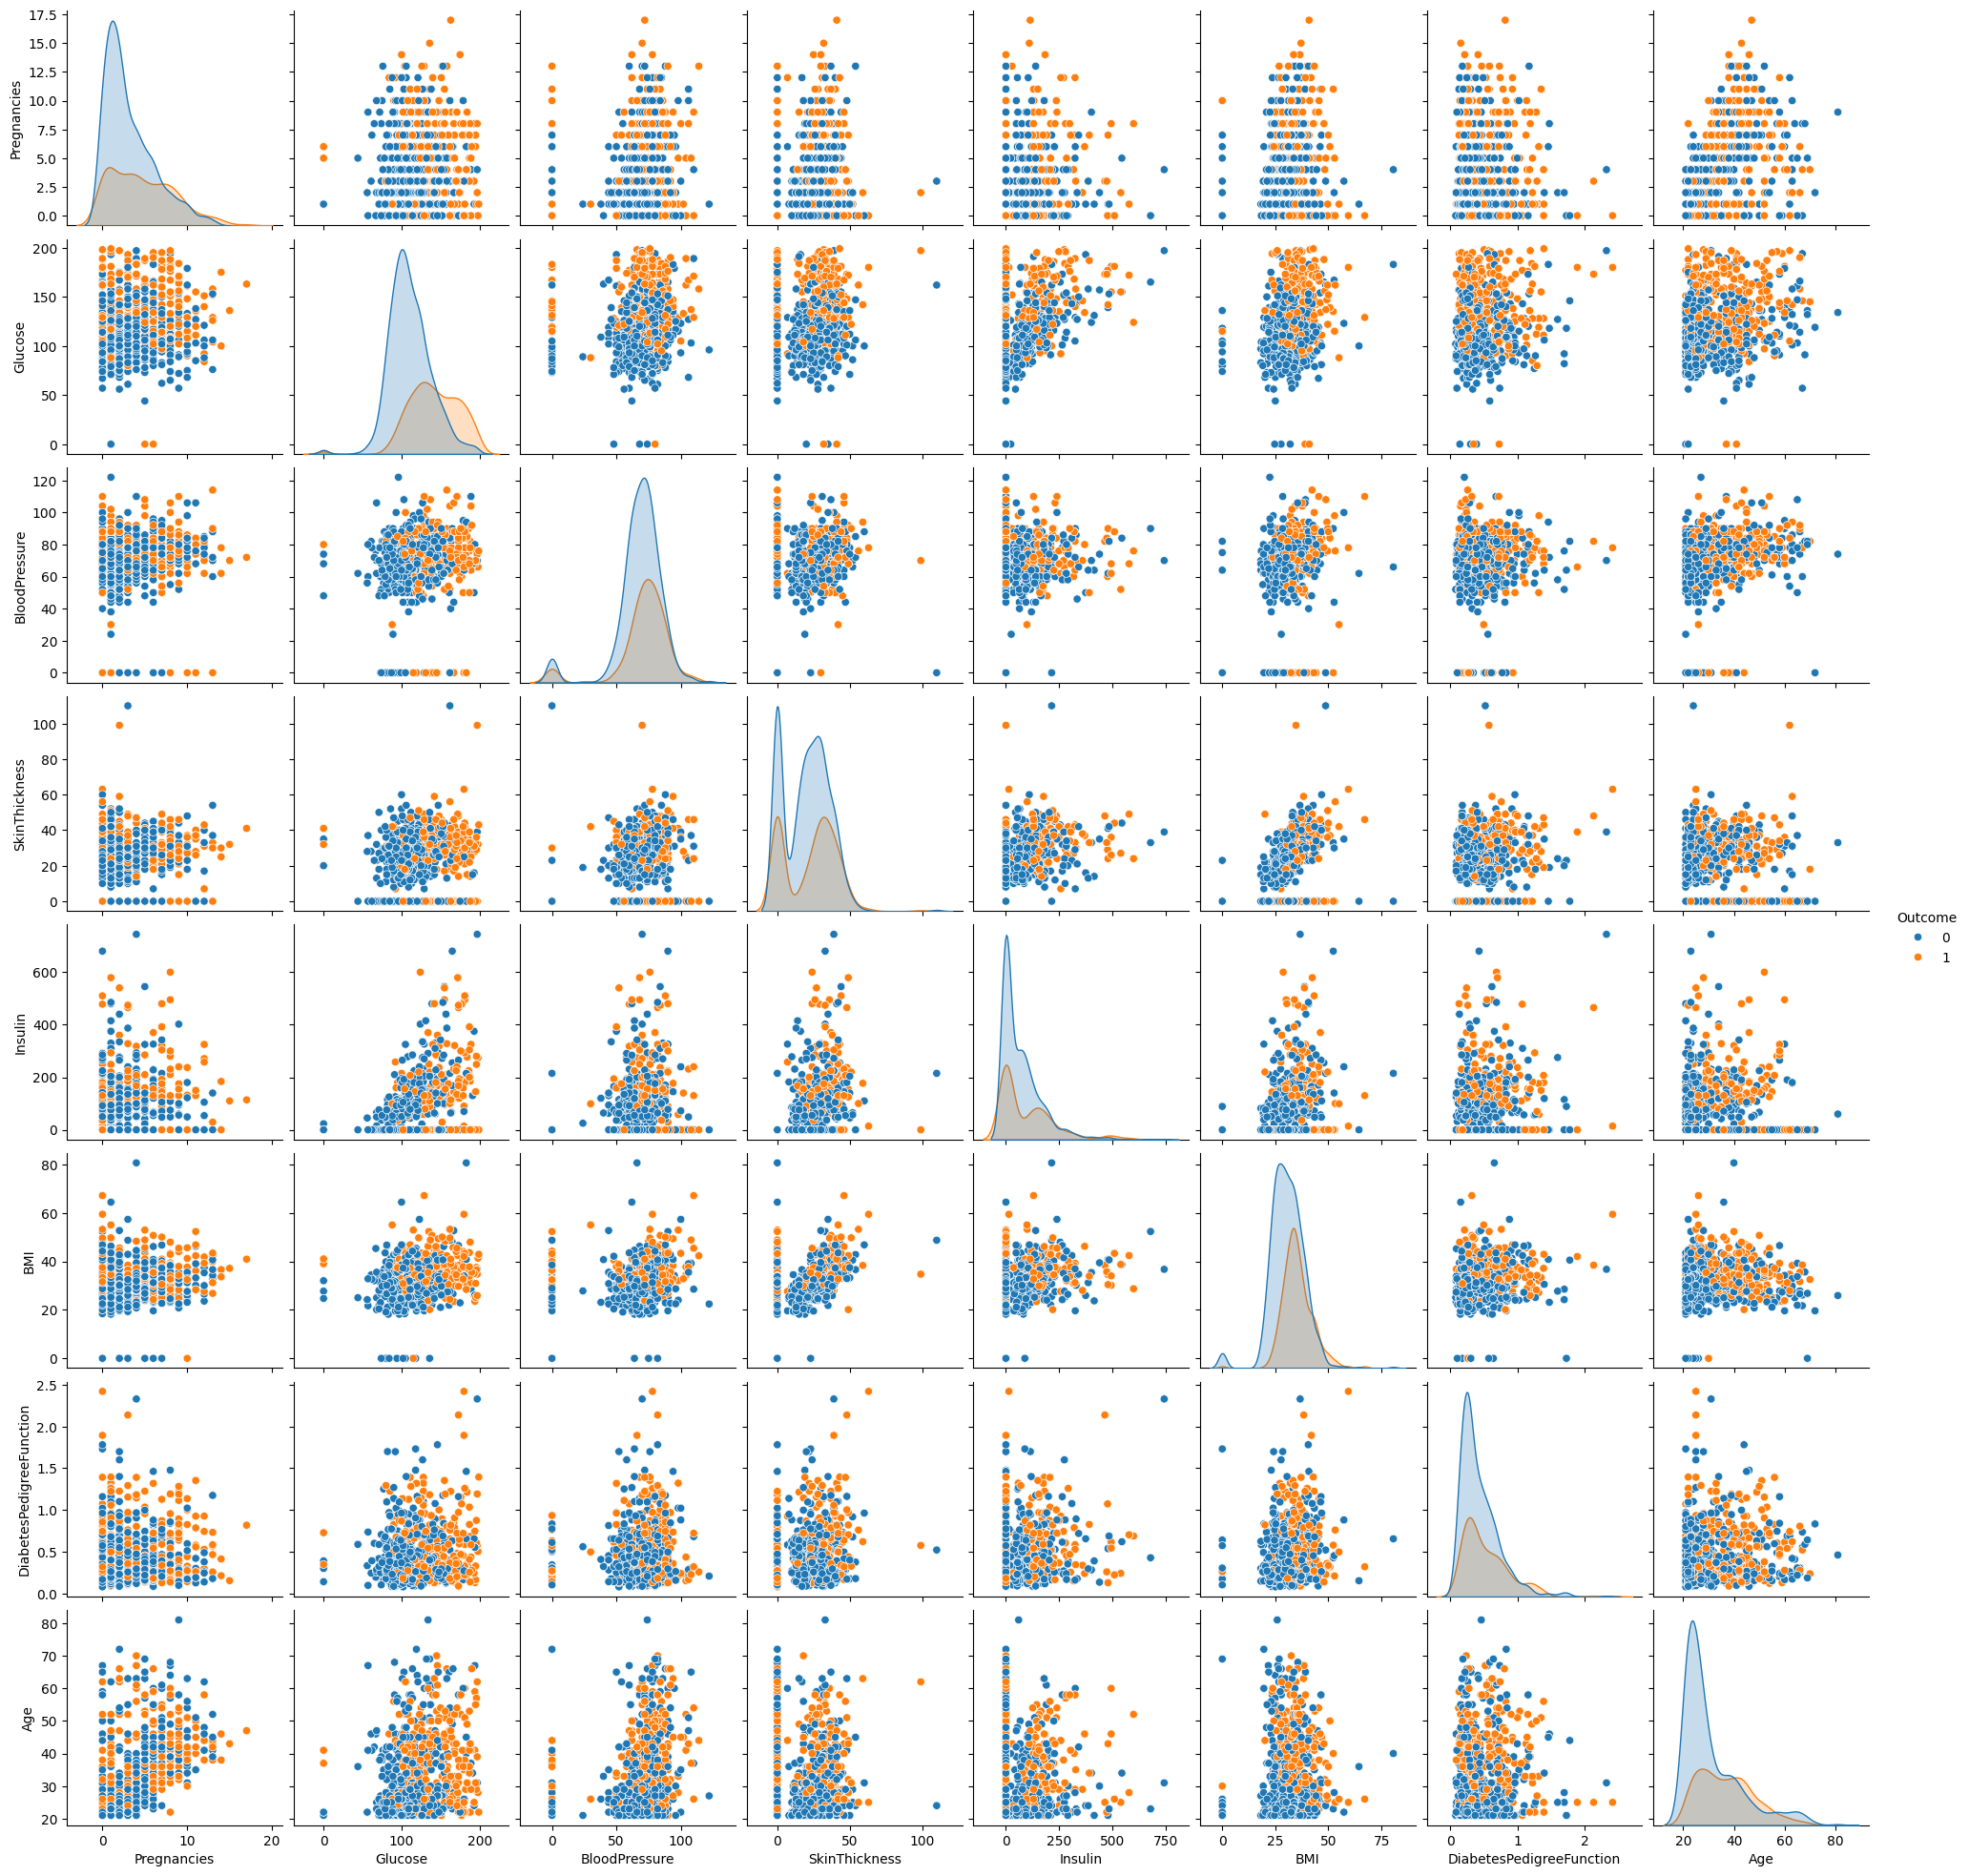

In [51]:
sns.pairplot(df,hue='Outcome')

<Axes: >

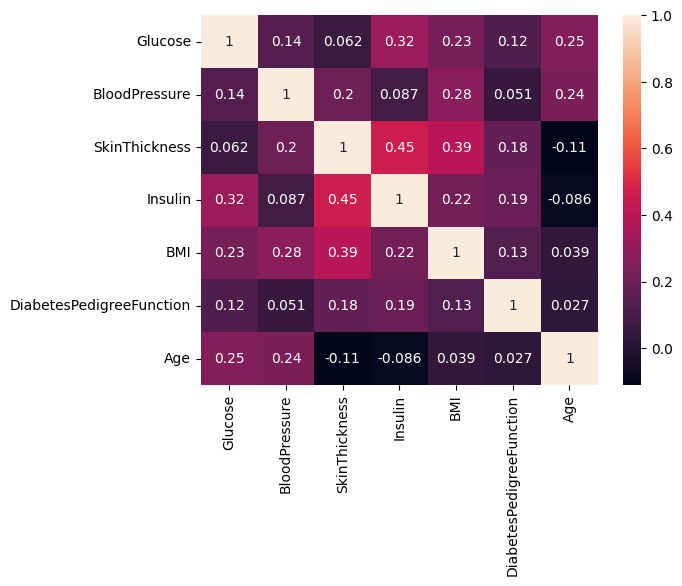

In [54]:
sns.heatmap(num.corr(),annot=True)